### 信用情報の学習

Kaggleの Home Credit Default Risk コンペティションの学習および推定を行います。


Home Credit Default Risk | Kaggle


## 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


・何を学習し、何を予測するのか  
・どのようなファイルを作りKaggleに提出するか  
・提出されたものはどういった指標値で評価されるのか


#### 解答
1,多くの顧客情報の中から有用なデータを使用して、顧客ローンの貸し出しができるか予測  
2,貸し出し可能な顧客への高水準での可否判定ファイル  
3,予測された確率から実際にローンを貸し出せる顧客の割合と、実際にはローンを貸し出せない顧客を貸し出せると顧客と推測した割合のROC曲線で評価する

#### 3.ベースラインモデルの作成

まずは単純な方法による ベースラインモデル　を作成します。精度の基準となるモデルです。


精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。


In [1]:
#基本ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sns.set()
%matplotlib inline

In [2]:
#訓練、検証用データの読み込み
app_train = pd.read_csv("application_train.csv.zip")
app_test = pd.read_csv("application_test.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#カテゴリカルデータをダミー変数化
app_train = pd.get_dummies(app_train)
print(app_train)

        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351

In [5]:
#欠損値
def missing_values_table(df):
    miss_val = app_train.isnull().sum()
    miss_val_per = app_train.isnull().sum() / len(app_train) * 100
    miss_val_table = pd.concat([miss_val, miss_val_per], axis=1)
    miss_val_table = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : 'Per of Total Values'}) 

    #表を欠損率順に並べ替え、欠損値０のサンプルは除外
    miss_val_table_sort = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values("Per of Total Values", ascending=False).round(1) #kakunin

    print("欠損値を含む列数：{}".format(str(miss_val_table_sort.shape[0]))) #shape[0]はmiss_val...の行のこと、ndarray.shape (2,3)などを思い出すと楽
    return miss_val_table_sort

In [6]:
#欠損値出力
missing_values = missing_values_table(app_train)
missing_values.head(20)

欠損値を含む列数：61


,Missing Values,Per of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
FLOORSMIN_MEDI,208642,67.8


In [7]:
#列ごとのデータ型
app_train.dtypes.value_counts()

uint8      140
float64     65
int64       41
dtype: int64

In [8]:
#列ごとのデータの種類
app_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Series([], dtype: float64)

In [9]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [10]:
#LabelEncodingを行う（列数を増やさず、値を数字に変換する）
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダオブジェクトを作成します
le = LabelEncoder()
le_count = 0

#列を反復処理します
for col in app_train:
    #値がオブジェクト型の時を条件指定
    if app_train[col].dtype == "object":
        # カテゴリ数が2つ以下の場合
        if len(list(app_train[col].unique())) <= 2:
            #訓練データで学習を行う
            le.fit(app_train[col])
            #訓練データ、検証データ共に変換する
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            #ラベルでエンコードされた列の数を追跡します
            le_count += 1
           
print("{}columnsをエンコードしました".format(le_count))

0columnsをエンコードしました


In [11]:
#One-Hot Encodingよりget_dummiesの方がよい
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print('訓練データは:{}, 検証データは:{}'.format(app_train.shape, app_test.shape))

訓練データは:(307511, 246), 検証データは:(48744, 242)


In [12]:
#ターゲットとIDを分断して保管
train_labels = app_train["TARGET"]
train_id = app_train["SK_ID_CURR"]
test_id = app_test["SK_ID_CURR"]

#データの桁数を揃える
#df_trainとdf_testをjoin(両方含む)値に変換
app_train, app_test = app_train.align(app_test, join="inner", axis=1)
print("app_train shape:", app_train.shape)
print("app_test shape:", app_test.shape)

app_train shape: (307511, 242)
app_test shape: (48744, 242)


In [13]:
#欠損値を埋める
#元データを残す
train_1 = app_train.copy()
test_1 = app_test.copy()

#特徴量リスト
features = list(app_train.columns)

#欠損値　オブジェクトは最頻値：for ＋　fillna()
#        数字は平均値で埋める

#欠損値を中央値で埋める
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(train_1)
train_1 = imputer.transform(train_1)
test_1 = imputer.transform(test_1)

In [14]:
#正規化
#最小値０，最大値１に正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_1)
train_1 = scaler.transform(train_1)
test_1 = scaler.transform(test_1)

print("訓練データの数：", train_1.shape)
print("検証データの数：", test_1.shape)                      

訓練データの数： (307511, 242)
検証データの数： (48744, 242)


## 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [15]:
#分析、前処理
#idも正規化で崩れたので削除
train_id = pd.DataFrame(train_id)
train_df = pd.DataFrame(train_1)
train_df.columns = features
train_df = train_df.drop(columns = "SK_ID_CURR")

In [16]:
#idを復元
train_df = pd.concat([train_id, train_df], axis=1)
train_df

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,0.852140,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,0.951929,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,0.827335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,0.601451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,0.825268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,0.896392,0.046133,0.657263,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,0.251071,1.000000,0.822147,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,456253,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,0.578523,0.026076,0.726937,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,456254,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,0.747914,0.034258,0.896158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_labels, test_size=0.2, random_state=0)
print(f"特徴量の訓練データ = {len(X_train)} 特徴量の検証データ = {len(X_test)}")
print(f"正解ラベルの訓練データ = {len(y_train)} 正解ラベルの検証データ = {len(y_test)}")

特徴量の訓練データ = 246008 特徴量の検証データ = 61503
正解ラベルの訓練データ = 246008 正解ラベルの検証データ = 61503


In [18]:
#pd型に変換
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

#idの保管
X_train_id = X_train["SK_ID_CURR"]
X_test_id = X_test["SK_ID_CURR"]

<AxesSubplot:>

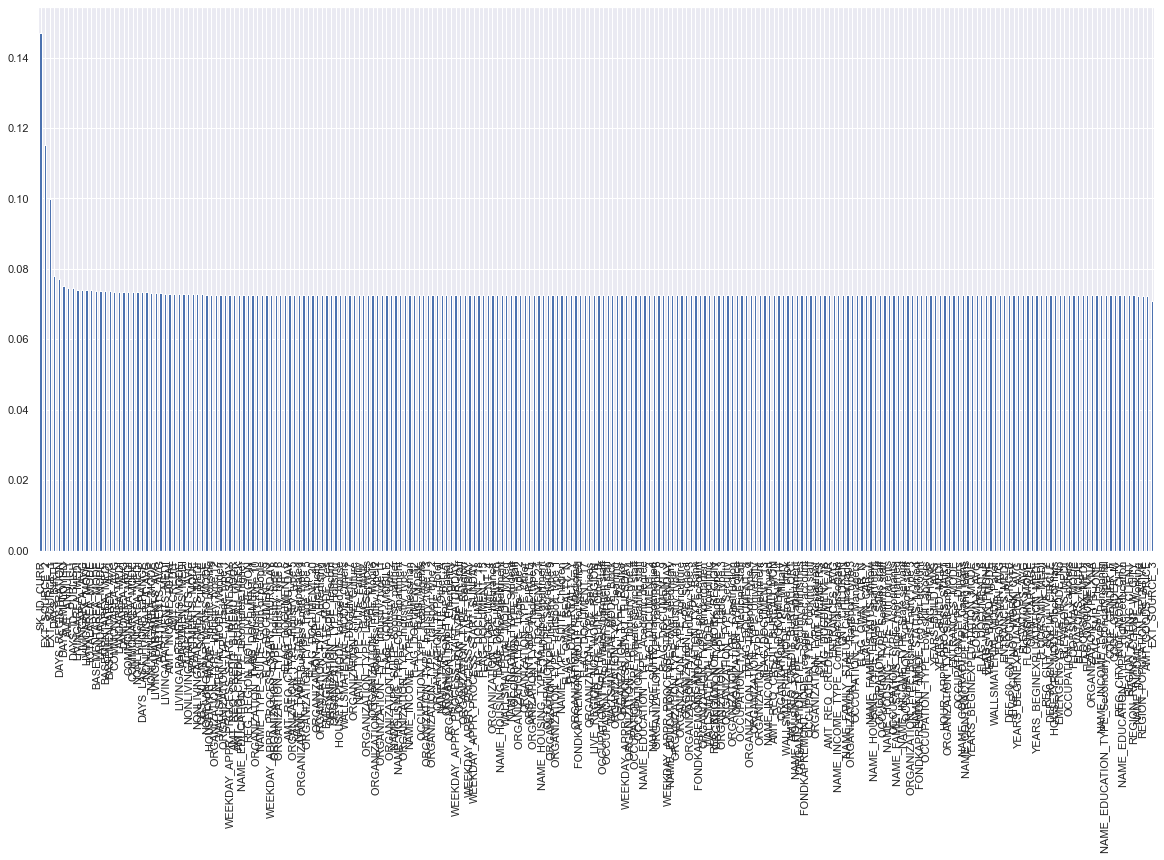

In [19]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, roc_auc_score

MSE_features = []
for feature in X_train_df.columns:
    clf = tree.DecisionTreeRegressor()
    clf.fit(X_train_df[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    MSE_features.append(mean_squared_error(y_test, y_pred))
    
MSE_series = pd.Series(MSE_features)
MSE_series.index = X_train_df.columns
MSE_series.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))

In [20]:
Xy_train = pd.concat([X_train_df, y_train], axis=1)
Xy_heatmap = Xy_train.corr()["TARGET"].sort_values()
print(f"ターゲットと相関関係が強い１０\n{Xy_heatmap.head(15)}")

ターゲットと相関関係が強い１０
EXT_SOURCE_2                           -0.160780
EXT_SOURCE_3                           -0.156426
EXT_SOURCE_1                           -0.100791
NAME_EDUCATION_TYPE_Higher education   -0.057033
CODE_GENDER_F                          -0.055213
NAME_INCOME_TYPE_Pensioner             -0.046110
ORGANIZATION_TYPE_XNA                  -0.045906
DAYS_EMPLOYED                          -0.044862
EMERGENCYSTATE_MODE_No                 -0.042173
HOUSETYPE_MODE_block of flats          -0.040627
AMT_GOODS_PRICE                        -0.040037
FLOORSMAX_AVG                          -0.039154
FLOORSMAX_MEDI                         -0.038949
FLOORSMAX_MODE                         -0.038158
REGION_POPULATION_RELATIVE             -0.036342
Name: TARGET, dtype: float64


In [21]:
#学習と評価
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#ランダムフォレスト
rfc = RandomForestClassifier(max_depth=2)

#学習
rfc.fit(X_train_df, y_train)

#予測
rfc_pred = rfc.predict(X_test_df)

#評価
print("score", rfc.score(X_test_df, y_test))
print("confusion matrix = \n", confusion_matrix(y_test, rfc_pred))
print("Classification report\n", classification_report(y_test, rfc_pred))

score 0.9210607612636782
confusion matrix = 
 [[56648     0]
 [ 4855     0]]
Classification report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.00      0.00      0.00      4855

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
threshold = 0.8
#テストデータがクラス１に属する確率を予測し、その確率からFPR,TPR,閾値を計算する
rfc_proba = rfc.predict_proba(X_test_df)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)

#FPR,TPR,閾値をデータフレームに格納して表示
fpr_tpr_threshold_df =pd.DataFrame([fpr, tpr, threshold])
fpr_tpr_threshold_df.T.head()

,0,1,2
0,0.000000,0.000000,1.119923
1,0.000000,0.000206,0.119923
2,0.000000,0.000412,0.119700
3,0.000018,0.000412,0.119604
4,0.000018,0.000618,0.119552


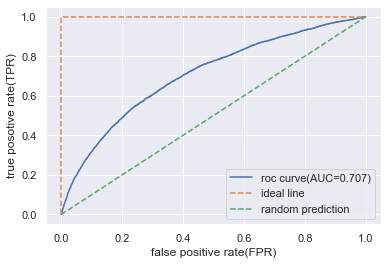

In [23]:
#ROC曲線を描き、AUCを算出
plt.plot(fpr, tpr, label="roc curve(AUC=%0.3f)" % auc(fpr, tpr))
plt.plot([0, 0, 1], [0, 1, 1], linestyle="--", label="ideal line")
plt.plot([0, 1], [0, 1], linestyle="--", label="random prediction")
plt.legend()
plt.xlabel("false positive rate(FPR)")
plt.ylabel("true posotive rate(TPR)")
plt.show()

## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

4.特徴量エンジニアリング

ベースラインモデルを元に、入力する特徴量にさまざまな工夫を行い精度を向上させていきます。

#### 解答
問題３の提出内容などは問題２の解答内
スコア、０．７０９

## 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


・どの特徴量を使うか  
・どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

#時間短縮のためデータを１０分の１にする

In [24]:
x_train_df = X_train_df[:24000]
x_test_df = X_test_df[:6100]
y_train_df = y_train[:24000]
y_test_df = y_test[:6100]
print(x_train_df.shape)

(24000, 242)


In [25]:
#ロジステック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=50, random_state=0)
lr.fit(x_train_df, y_train_df)
lr_pred = lr.predict(x_test_df)

#評価
print("score", lr.score(x_test_df, y_test_df))
print("confusion matix = \n", confusion_matrix(y_test_df, lr_pred))
print("Classification report\n", classification_report(y_test_df, lr_pred))

score 0.9249180327868852
confusion matix = 
 [[5642    0]
 [ 458    0]]
Classification report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      5642
           1       0.00      0.00      0.00       458

    accuracy                           0.92      6100
   macro avg       0.46      0.50      0.48      6100
weighted avg       0.86      0.92      0.89      6100



C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ren30\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
threshold = 0.8
#テストデータがクラス１に属する確率を予測し、その確率からFPR,TPR,閾値を計算する
rfc_proba = rfc.predict_proba(X_test_df)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)

#FPR,TPR,閾値をデータフレームに格納して表示
fpr_tpr_threshold_df =pd.DataFrame([fpr, tpr, threshold])
fpr_tpr_threshold_df.T.head()

,0,1,2
0,0.000000,0.000000,1.119923
1,0.000000,0.000206,0.119923
2,0.000000,0.000412,0.119700
3,0.000018,0.000412,0.119604
4,0.000018,0.000618,0.119552


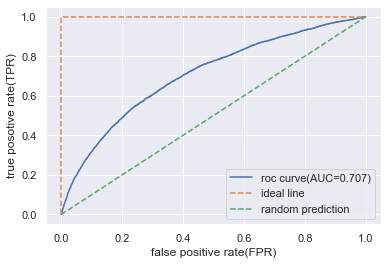

In [27]:
#ROC曲線を描き、AUCを算出
plt.plot(fpr, tpr, label="roc curve(AUC=%0.3f)" % auc(fpr, tpr))
plt.plot([0, 0, 1], [0, 1, 1], linestyle="--", label="ideal line")
plt.plot([0, 1], [0, 1], linestyle="--", label="random prediction")
plt.legend()
plt.xlabel("false positive rate(FPR)")
plt.ylabel("true posotive rate(TPR)")
plt.show()

In [28]:
どの特徴量を使うか
どう前処理をするか

解答
相関の高いものの特徴量を使う
前処理は削除や揃える

AUCが高い

NameError: name 'どの特徴量を使うか' is not defined